# Heat budget calculation
Close the heat budget on the native grid

In [1]:
import xarray as xr
%matplotlib inline

In [2]:
rootdir = '/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/'
datadir = 'ocean_annual/av/annual_10yr/'
filename = 'ocean_annual.0941-0950.ann.nc'
ds = xr.open_dataset(rootdir+datadir+filename)

KeyboardInterrupt: 

#### Temperature  

[degC]

Potential temperature: `thetao` (x,y,z)

#### Surface heat fluxes
[W m^-2]  

Outgoing longwave: `rlntds` (x,y)  
Incoming shortwave: `rsdo` (x,y,z)  
Sensible: `hfsso` (x,y)  
Latent: `hflso` (x,y)  

#### Bottom boundary heat flux
[W m^-2]  

Geothermal: `hfgeou` (x,y,z)  

#### Advective heat flux (by residual mean)

[W m^-2]  

Zonal flux: `T_adx` (x,y,z)  
Meridional flux: `T_ady` (x,y,z)  

#### Diffusive heat flux

[W m^-2]  

Zonal flux: `T_diffx` (x,y,z)  
Meridional flux: `T_diffy` (x,y,z)  

Heat flux due to parameterized mesoscale diffusion: `T_dfxy_cont_tendency` (x,y,z)   
Temperature tendency due to parameterized mesoscale diffusion `T_dfxy_conc_tendency` (x,y,z) [degC s^-1]

#### Vertical remap

Temperature tendency due to remap: `T_tendency_vert_remap` (x,y,z) [degC s^-1]

Or as heat content: `Th_tendency_vert_remap` (x,y,z) [W m

#### Temperature tendency

[degC s-1]   

Tendency: `T_tendency` [x,y,z]  

In [13]:
# Try to pull all of the terms together into one dataset
ds_budget = xr.merge([ds.thetao, ds.T_tendency, ds.rlntds, ds.rsdo, ds.hfsso, ds.hflso])

In [18]:
s = ds_budget.isel(zi=0)
s

<xarray.Dataset>
Dimensions:     (time: 1, xh: 720, yh: 576, zl: 75)
Coordinates:
  * xh          (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh          (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * zl          (zl) float64 1.0 3.0 5.0 7.0 ... 3.338e+03 3.591e+03 5.111e+03
  * time        (time) object 0946-01-01 00:00:00
    zi          float64 0.0
Data variables:
    thetao      (time, zl, yh, xh) float32 ...
    T_tendency  (time, zl, yh, xh) float32 ...
    rlntds      (time, yh, xh) float32 ...
    rsdo        (time, yh, xh) float32 ...
    hfsso       (time, yh, xh) float32 ...
    hflso       (time, yh, xh) float32 ...

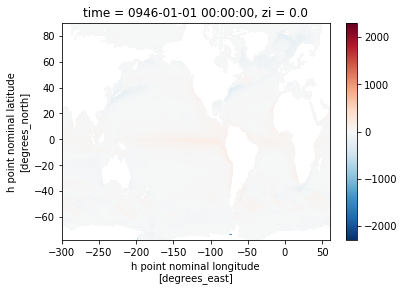

In [20]:
hflx = s.rlntds+s.rsdo+s.hfsso+s.hflso
hflx.plot()

In [24]:
ds.hfrainds

<xarray.DataArray 'hfrainds' (time: 1, yh: 576, xh: 720)>
[414720 values with dtype=float32]
Coordinates:
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * time     (time) object 0946-01-01 00:00:00
Attributes:
    long_name:      Heat content (relative to 0degC) of liquid+frozen precip ...
    units:          W m-2
    cell_measures:  area: areacello
    standard_name:  temperature_flux_due_to_rainfall_expressed_as_heat_flux_i...
    cell_methods:   area:mean yh:mean xh:mean time: mean
    time_avg_info:  average_T1,average_T2,average_DT